<a href="https://colab.research.google.com/github/Priyanshu-4096/21BDS0083_EDA/blob/main/21BDS0083_eda_mod5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Priyanshu-4096/21BDS0083_EDA

#Name - Priyanshu Joarder
#Reg no - 21BDS0083
#Course Title - Exploratory Data Analysis
#Course Code - BCSE331L

Module 5:Clustering Algorithms

Initializing clustering analysis...
Data preparation completed successfully
Shape of prepared data: (2571, 6)

Performing Spectral Clustering...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


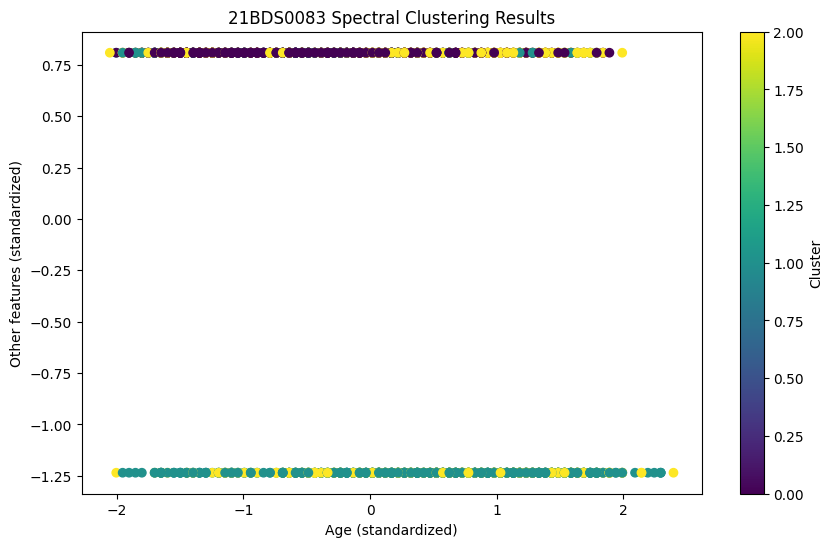


Performing Document Clustering...
Error in document clustering: empty vocabulary; perhaps the documents only contain stop words

Performing MST Clustering...


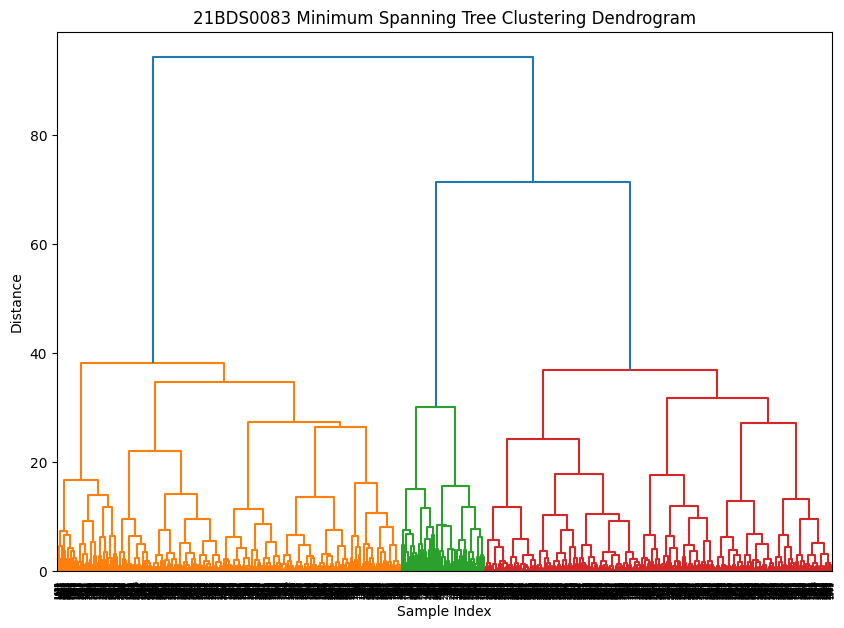


Performing Model-based Clustering...


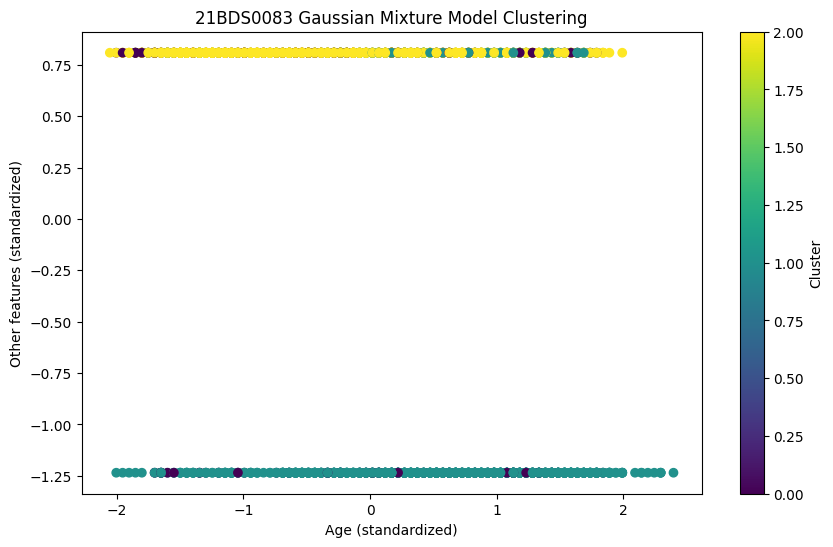

BIC Score: -41289.2903515111

Performing Outlier Detection...


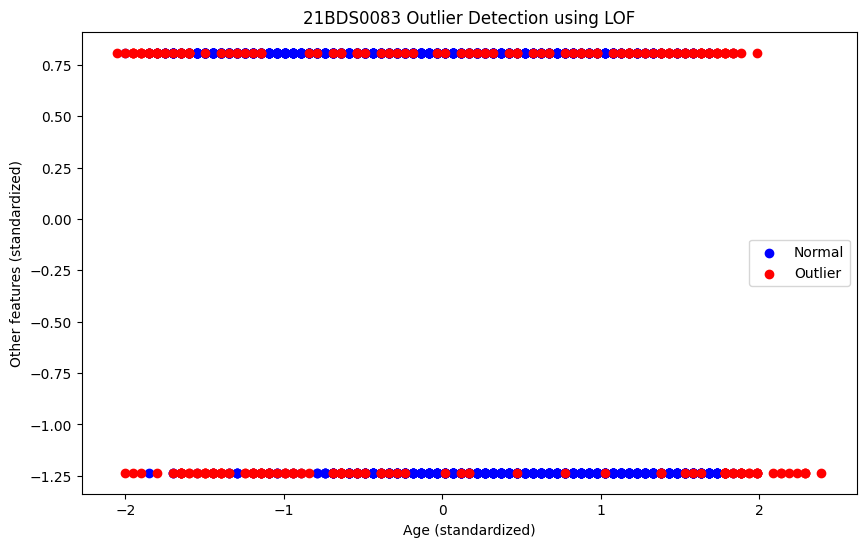

Percentage of outliers detected: 10.00%
Error in main execution: Expected a 1D array, got an array with shape (2571, 2571)


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns

class AdvancedClustering:
    def __init__(self, df):
        self.df = df.copy()
        self.X = None
        self.prepare_data()

    def prepare_data(self):
        """Prepare data for clustering by handling categorical data and scaling numerical features"""
        # Handle categorical variables and unknown values first
        categorical_columns = self.df.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            le = LabelEncoder()
            # Replace unknown values with most frequent value
            self.df[col] = self.df[col].replace('unknown', self.df[col].mode()[0])
            self.df[col] = le.fit_transform(self.df[col])

        # Select features for clustering
        features = ['Age', 'Hospitalised', 'Died', 'Urban', 'Year', 'Month']

        # Ensure all features are numeric
        X = self.df[features].copy()

        # Handle any remaining missing values
        for col in X.columns:
            X[col] = pd.to_numeric(X[col], errors='coerce')
            X[col] = X[col].fillna(X[col].mean())

        # Scale the features
        scaler = StandardScaler()
        self.X = scaler.fit_transform(X)

        print("Data preparation completed successfully")
        print("Shape of prepared data:", self.X.shape)

    def spectral_clustering(self, n_clusters=3):
        """Perform spectral clustering"""
        try:
            spectral = SpectralClustering(n_clusters=n_clusters,
                                        affinity='nearest_neighbors',
                                        random_state=42)
            clusters = spectral.fit_predict(self.X)

            # Visualize results
            plt.figure(figsize=(10, 6))
            plt.scatter(self.X[:, 0], self.X[:, 1], c=clusters, cmap='viridis')
            plt.title('21BDS0083 Spectral Clustering Results')
            plt.xlabel('Age (standardized)')
            plt.ylabel('Other features (standardized)')
            plt.colorbar(label='Cluster')
            plt.show()

            return clusters

        except Exception as e:
            print(f"Error in spectral clustering: {str(e)}")
            return None

    def document_clustering(self):
        """Perform document clustering on categorical features"""
        try:
            # Create document vectors using all categorical features
            categorical_features = self.df.select_dtypes(include=['object']).columns

            # If no categorical features are found, use 'method' column (converted to string)
            if len(categorical_features) == 0:
                text_data = self.df['method'].astype(str)
            else:
                # Combine all categorical features into a single text string for each row
                text_data = self.df[categorical_features].apply(lambda x: ' '.join(x.astype(str)), axis=1)

            # Convert to TF-IDF features
            tfidf = TfidfVectorizer(max_features=100)  # Limit features to prevent memory issues
            text_features = tfidf.fit_transform(text_data)

            # Apply hierarchical clustering
            n_clusters = min(4, len(self.df))  # Ensure n_clusters doesn't exceed number of samples
            clustering = AgglomerativeClustering(n_clusters=n_clusters)
            doc_clusters = clustering.fit_predict(text_features.toarray())

            # Visualize document clusters
            plt.figure(figsize=(10, 6))
            for i in range(n_clusters):
                mask = doc_clusters == i
                plt.scatter(self.X[mask, 0], self.X[mask, 1], label=f'Cluster {i}')
            plt.title('21BDS0083 Document Clustering based on Categorical Features')
            plt.xlabel('Age (standardized)')
            plt.ylabel('Other features (standardized)')
            plt.legend()
            plt.show()

            return doc_clusters

        except Exception as e:
            print(f"Error in document clustering: {str(e)}")
            return None

    def mst_clustering(self):
        """Perform Minimum Spanning Tree clustering"""
        try:
            # Calculate distance matrix
            from scipy.spatial.distance import pdist, squareform
            dist_matrix = squareform(pdist(self.X))

            # Calculate MST
            mst = minimum_spanning_tree(dist_matrix).toarray()

            # Convert MST to linkage matrix for hierarchical clustering
            linkage_matrix = linkage(self.X, method='ward')

            # Plot dendrogram
            plt.figure(figsize=(10, 7))
            dendrogram(linkage_matrix)
            plt.title('21BDS0083 Minimum Spanning Tree Clustering Dendrogram')
            plt.xlabel('Sample Index')
            plt.ylabel('Distance')
            plt.show()

            return mst

        except Exception as e:
            print(f"Error in MST clustering: {str(e)}")
            return None

    def model_based_clustering(self, n_components=3):
        """Perform model-based clustering using Gaussian Mixture Models"""
        try:
            # Initialize and fit GMM
            gmm = GaussianMixture(n_components=n_components,
                                random_state=42)
            gmm_clusters = gmm.fit_predict(self.X)

            # Plot results
            plt.figure(figsize=(10, 6))
            scatter = plt.scatter(self.X[:, 0], self.X[:, 1],
                                c=gmm_clusters, cmap='viridis')
            plt.title('21BDS0083 Gaussian Mixture Model Clustering')
            plt.xlabel('Age (standardized)')
            plt.ylabel('Other features (standardized)')
            plt.colorbar(scatter, label='Cluster')
            plt.show()

            # Calculate and print BIC score
            bic_score = gmm.bic(self.X)
            print(f"BIC Score: {bic_score}")

            return gmm_clusters

        except Exception as e:
            print(f"Error in model-based clustering: {str(e)}")
            return None

    def detect_outliers(self):
        """Detect outliers using Local Outlier Factor"""
        try:
            # Initialize LOF
            lof = LocalOutlierFactor(n_neighbors=min(20, len(self.df)-1),
                                   contamination=0.1)
            outlier_labels = lof.fit_predict(self.X)

            # Plot results
            plt.figure(figsize=(10, 6))
            plt.scatter(self.X[outlier_labels == 1, 0],
                       self.X[outlier_labels == 1, 1],
                       c='blue', label='Normal')
            plt.scatter(self.X[outlier_labels == -1, 0],
                       self.X[outlier_labels == -1, 1],
                       c='red', label='Outlier')
            plt.title('21BDS0083 Outlier Detection using LOF')
            plt.xlabel('Age (standardized)')
            plt.ylabel('Other features (standardized)')
            plt.legend()
            plt.show()

            # Calculate percentage of outliers
            outlier_percentage = (outlier_labels == -1).sum() / len(outlier_labels) * 100
            print(f"Percentage of outliers detected: {outlier_percentage:.2f}%")

            return outlier_labels

        except Exception as e:
            print(f"Error in outlier detection: {str(e)}")
            return None

def main():
    try:
        # Load the dataset
        df = pd.read_csv('SuicideChina.csv')

        # Initialize clustering analysis
        print("Initializing clustering analysis...")
        clustering = AdvancedClustering(df)

        # Perform all clustering methods
        results = {}

        print("\nPerforming Spectral Clustering...")
        results['spectral_clusters'] = clustering.spectral_clustering()

        print("\nPerforming Document Clustering...")
        results['doc_clusters'] = clustering.document_clustering()

        print("\nPerforming MST Clustering...")
        results['mst'] = clustering.mst_clustering()

        print("\nPerforming Model-based Clustering...")
        results['gmm_clusters'] = clustering.model_based_clustering()

        print("\nPerforming Outlier Detection...")
        results['outliers'] = clustering.detect_outliers()

        # Add clustering results to original dataframe
        for name, result in results.items():
            if result is not None:
                df[name] = result

        # Save results
        df.to_csv('SuicideChina_clustered.csv', index=False)
        print("\nResults saved to ModifiedSuicideChina_clustered.csv")

        return df

    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        return None

if __name__ == "__main__":
    clustered_df = main()